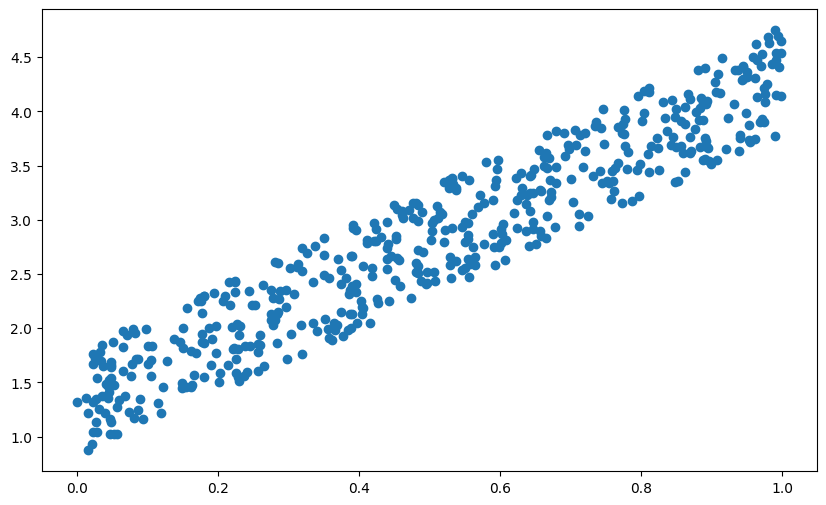

In [13]:
#手写线性回归

import torch
x = torch.rand([500,1])
noise = torch.rand(size=(500,1))
y_true = x*3+0.8+noise

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
plt.scatter(x,y_true)

In [14]:
w = torch.tensor([[0]],dtype=torch.float32,requires_grad=True)
b = torch.tensor(0,dtype=torch.float32,requires_grad=True)
print(w,b)
num_epochs = 1000
lr = 0.05
hist = []
for epoch in range(num_epochs):
    y_pred = torch.mm(x,w)+b
    loss = (y_pred-y_true).pow(2).mean()
    if w.grad is not None:
        w.grad.data.zero_()
    if b.grad is not None:
        b.grad.data.zero_()
    loss.backward()
    hist.append(loss.detach())
    w.data = w.data-lr*w.grad
    b.data = b.data-lr*b.grad
    if (epoch+1)%100==0:
        print(f'epoch: {epoch} loss: {loss}')
print(w.detach())
print(b.detach())

tensor([[0.]], requires_grad=True) tensor(0., requires_grad=True)
epoch: 99 loss: 0.15799036622047424
epoch: 199 loss: 0.10497600585222244
epoch: 299 loss: 0.09100572764873505
epoch: 399 loss: 0.08732430636882782
epoch: 499 loss: 0.08635418862104416
epoch: 599 loss: 0.08609852939844131
epoch: 699 loss: 0.08603116869926453
epoch: 799 loss: 0.08601342141628265
epoch: 899 loss: 0.08600874245166779
epoch: 999 loss: 0.0860074982047081
tensor([[2.9963]])
tensor(1.3041)


[[2.9962764]]


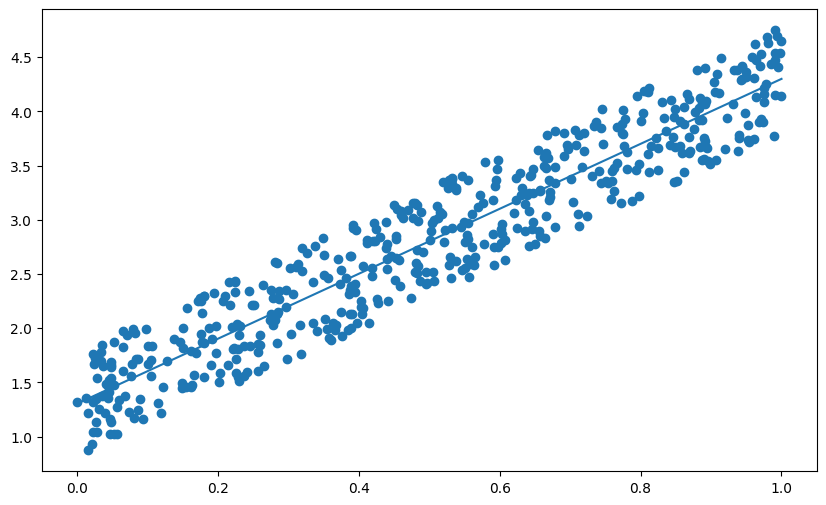

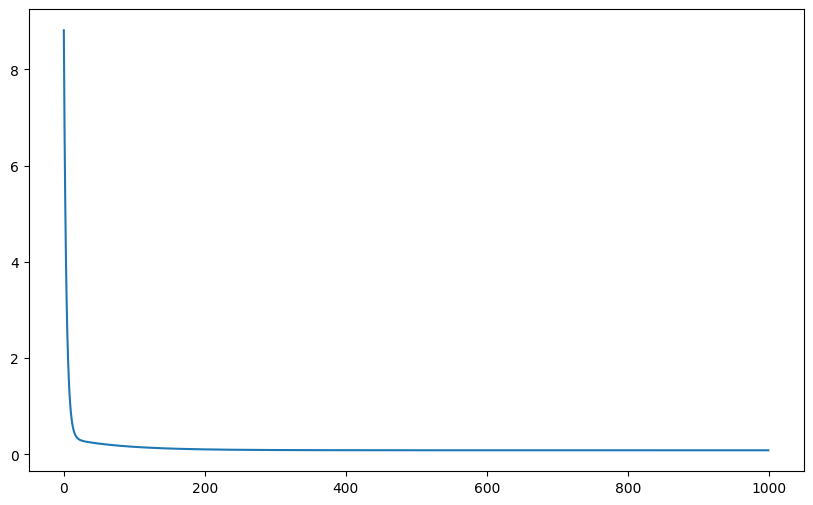

In [15]:
w = w.detach().numpy()
b = b.detach().numpy()
print(w)
w = w[0]
fig = plt.figure(figsize=(10,6))
y1 = w*0+b
y2 = w*1+b
plt.plot([0,1],[y1,y2])
plt.scatter(x,y_true)

fig = plt.figure(figsize=(10,6))
plt.plot(hist)

In [16]:
# nn.Module简化实现线性回归
import torch.nn as nn

epoch: 499 loss: 0.08687834441661835
epoch: 999 loss: 0.08600816875696182
epoch: 1499 loss: 0.08600706607103348
epoch: 1999 loss: 0.08600705862045288
epoch: 2499 loss: 0.08600705862045288
epoch: 2999 loss: 0.08600705862045288
epoch: 3499 loss: 0.08600705862045288
epoch: 3999 loss: 0.08600705862045288
epoch: 4499 loss: 0.08600705862045288
epoch: 4999 loss: 0.08600705862045288


c:\Users\26250\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\shape_base.py:65: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  ary = asanyarray(ary)
c:\Users\26250\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


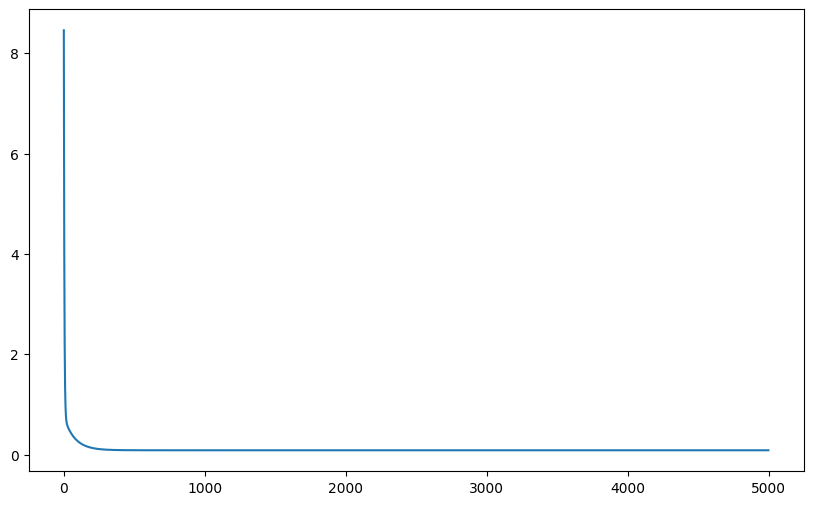

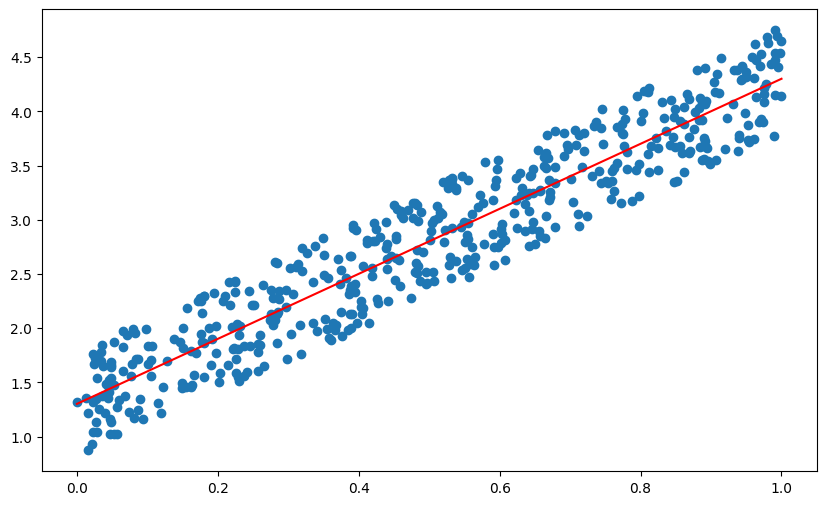

In [17]:

class LR(nn.Module):
    def __init__(self):
        super(LR,self).__init__()
        self.linear = nn.Linear(1,1)
    
    def forward(self,x):
        out = self.linear(x)
        return out
    
module = LR()
loss = nn.MSELoss()
optimiser = torch.optim.SGD(module.parameters(),lr = 0.05)

num_epochs = 5000
hist = []
for epoch in range(num_epochs):
    y_pred = module(x)
    l=loss(y_true,y_pred)
    optimiser.zero_grad()
    l.backward()
    optimiser.step()
    hist.append(l.detach())
    if (epoch+1)%500==0:
        print(f"epoch: {epoch} loss: {l}")
    
fig = plt.figure(figsize=(10,6))
plt.plot(hist)

fig = plt.figure(figsize=(10,6))
y1 = module(torch.tensor([[0]],dtype=torch.float32))
y2 = module(torch.tensor([[1]],dtype=torch.float32))
plt.plot([0,1],[y1.detach(),y2.detach()],'r-')
plt.scatter(x,y_true)